<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 4 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 26 September 2022, with material from Peter Norvig and Chris Fonnesbeck</div>

# Data Wrangling with Pandas and a *practical* introduction to statistics

We introduce the python analog to the `dplyr` R package, and we learn how to use it by learning a bit of statistics!

<br />
<center>
<img src="ipynb.images/kungfu-panda.png" width=600 />
</center>

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled (hierarchical) data or both. It is a fundamental high-level building block for doing practical, real world, **scientific data analysis** in Python.

![Protein Strucure with Sugar](ipynb.images/LysozymeRock.gif)

`pandas` is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) *time series* (1D) data

- Arbitrary *matrix* (2 and higher D) data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features are:

- Shape mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically

- Intuitive merging and joining of data sets

- Flexible reshaping and pivoting of data sets

- Robust IO tools for loading data from flat files, Excel files, databases, HDF5, etc.

- Build-in statistics and linear regressions, extensible with additional packages (e.g. statsmodels)

After you used RStudio, you might have thought you would never use Excel functions to analyze data anymore. After today, you wil probably prefer to import your excel spreadsheet into a notebook and use pandas & friends for your data analysis.

We'll also introduce **statistics** in this notebook.

The most important data structures in `pandas` are 1D **Series** (vectors) and 2D **dataframes** (matrices).

# 1. Introduction to pandas *Series*

`pandas` Series are **vectors**!

In [3]:
#Series Lab
import pandas as pd

In [4]:
obj = pd.Series([10,20,30,40,50])
obj

0    10
1    20
2    30
3    40
4    50
dtype: int64

Do you see how the series automatically gets its own index?

In [5]:
obj.values

array([10, 20, 30, 40, 50])

In [6]:
obj.index

RangeIndex(start=0, stop=5, step=1)

We can also specify an index that we pick:

In [ ]:
obj = pd.Series([10,20,30,40,50], index = ['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
obj['a'], obj[0]

We can query data with predicates as index:

In [ ]:
obj[obj > 20]

We can analyze NBA games, too:

In [ ]:
nba = {'Celtics': 3, "Heat": 4}
data = pd.Series(nba)
data

Hmm.. I think we need more than one dimension to analyze the NBA. Once we increase the number of dimensions, we move on pandas' `DataFrame`:

# 2. Introduction to pandas *DataFrames*

`pandas` dataframes are excel **spreadsheets**, also known mathematically as **matrices**!

Let's import data as a dictionary structure:

In [ ]:
nba = {"east": ['Celtics', "Cavs", "76ers"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf

In [ ]:
# But.. does this work?
nba = {"east": ['Celtics', "Cavs"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf


Oh no! What to do?

In [ ]:
# ..so do this instead, and pandas adds 'None' or 'NaN' where data's missing
nbadf = pd.DataFrame.from_dict(nba, orient='index')
nbadf

To get the `east` row:

In [ ]:
nbadf.loc['east']

To get the first column:

In [ ]:
nbadf.loc[:, 0]

If we add dictionaries as the data itself, this gives pandas the opportunity to add specified indexes as rows and columns:

In [ ]:
nba2 = {"east": {'MA': 'Celtics', 'IN': "Cavs"}, "west": {"CA": "Warriors", "CAS": "Lakers", "IL": "Chicago"}}
nbadf = pd.DataFrame(nba2)
nbadf

In [ ]:
nbadf.T

In [ ]:
nbadf

In [ ]:
nbadf.columns

In [ ]:
nbadf.index

In [ ]:
nbadf['east']

In [ ]:
nbadf.iloc[:, 0]

Let's reindex:

In [ ]:
obj2 = nbadf.reindex(['MA', 'IN', 'IL', 'CA', 'CAS'])
obj2

Can we work with data independently of indexes? Yes, using **numpy matrices**!

Let's use python's `arange` to create a range of numbers, and `reshape` to shape the dimensions of our dataset:

In [ ]:
import numpy as np
nba3 = np.arange(0,9).reshape(3,3)
nba3

And let's attach the data to rows and columns to give it a context!

In [ ]:
nbadf3 = pd.DataFrame(nba3, index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

In [ ]:
# this looks.. fake. Let's use random number generator in matrix to make the data look more real!
nbadf3 = pd.DataFrame(np.random.randn(3,3), index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

In [ ]:
nbadf3['Celtics']

In [ ]:
nbadf3.loc[:, 'Celtics'] # this is how you access columns by name

In [ ]:
nbadf3.loc['MA', :] # this is how you access rows by name

In [ ]:
nbadf3.iloc[:,0]

How do we apply math formulas to the data like we do it in excel?

In [ ]:
def f(x): return x.max() - x.min()

In [ ]:
# formula as lambda
f = lambda x: x.max() - x.min() 
nbadf3.apply(f)

In [ ]:
nbadf3.apply(f, axis = 'columns')

## 3D Dataframes
Building higher dimensiona; pandas Dataframes.

First, we *hack* it:

In [7]:
import numpy as np
A = np.array(['one', 'one', 'two', 'two', 'three', 'three'])
B = np.array(['start', 'end']*3)
C = [np.random.randint(10, 99, 6)]*6
fake3D = list(zip(A, B, C))
fake3D

[('one', 'start', array([53, 26, 22, 78, 73, 25])),
 ('one', 'end', array([53, 26, 22, 78, 73, 25])),
 ('two', 'start', array([53, 26, 22, 78, 73, 25])),
 ('two', 'end', array([53, 26, 22, 78, 73, 25])),
 ('three', 'start', array([53, 26, 22, 78, 73, 25])),
 ('three', 'end', array([53, 26, 22, 78, 73, 25]))]

In [8]:
import pandas as pd

df = pd.DataFrame(fake3D, columns=['A', 'B', 'C'])
df

,A,B,C
0,one,start,"[53, 26, 22, 78, 73, 25]"
1,one,end,"[53, 26, 22, 78, 73, 25]"
2,two,start,"[53, 26, 22, 78, 73, 25]"
3,two,end,"[53, 26, 22, 78, 73, 25]"
4,three,start,"[53, 26, 22, 78, 73, 25]"
5,three,end,"[53, 26, 22, 78, 73, 25]"


In [9]:
df.set_index(['A', 'B'], inplace=True)
df

C
A     B                              
one   start  [53, 26, 22, 78, 73, 25]
      end    [53, 26, 22, 78, 73, 25]
two   start  [53, 26, 22, 78, 73, 25]
      end    [53, 26, 22, 78, 73, 25]
three start  [53, 26, 22, 78, 73, 25]
      end    [53, 26, 22, 78, 73, 25]

And the above is a 3D dataframe, with the 3 "*slices*" one below the other, just the way numpy prints 3D tensors.

We can even put the slices as columns:

In [10]:
C = np.array(C)
df3 = pd.DataFrame(data=C.T, columns=pd.MultiIndex.from_tuples(zip(A,B)))
df3

one       two     three    
  start end start end start end
0    53  53    53  53    53  53
1    26  26    26  26    26  26
2    22  22    22  22    22  22
3    78  78    78  78    78  78
4    73  73    73  73    73  73
5    25  25    25  25    25  25

Then, there is also a "*proper*" way of doing this, using the `xarray` library:

In [12]:
import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

In [13]:
times

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2001-12-22', '2001-12-23', '2001-12-24', '2001-12-25',
               '2001-12-26', '2001-12-27', '2001-12-28', '2001-12-29',
               '2001-12-30', '2001-12-31'],
              dtype='datetime64[ns]', name='time', length=731, freq='D')

In [14]:
len(annual_cycle)

731

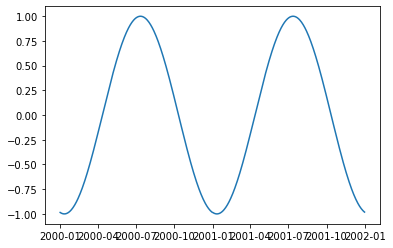

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

myplot = plt.plot(times, annual_cycle)

In [16]:
tmin_values.shape

(731, 3)

In [17]:
tmax_values.shape

(731, 3)

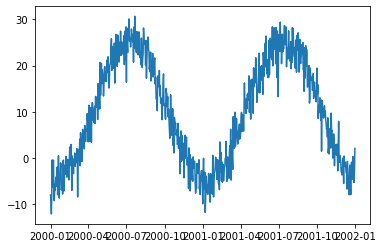

In [18]:
myplot = plt.plot(times, tmin_values[:,0])

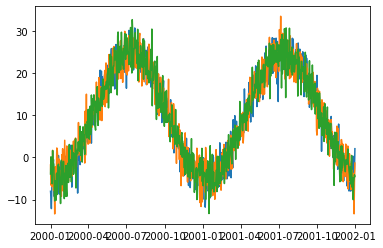

In [19]:
myplot = plt.plot(times, tmin_values)

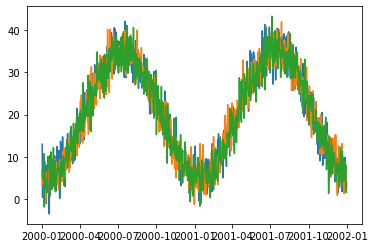

In [20]:
myplot = plt.plot(times, tmax_values)

In [21]:
ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["MA", "VA", "NH"]},
)

ds.to_array().shape

(2, 731, 3)

So we have a dataset that has two **columns** (`tmin`, `tmax`), 731 rows, and 3 slices (`MA`, `VA`, `NH`) off the plane of the screen of your laptop.

If we turn it to a pandas Dataframe:

In [22]:
df = ds.to_dataframe()
df.head()

tmin       tmax
time       location                     
2000-01-01 MA       -8.037369  12.980549
           VA       -1.788441   3.310409
           NH       -3.931542   6.778554
2000-01-02 MA       -9.341157   0.447856
           VA       -6.558073   6.372712

In [23]:
df.tail()

tmin      tmax
time       location                    
2001-12-30 VA       -5.180721  6.316954
           NH       -4.115679  1.557992
2001-12-31 MA        2.063276  6.635934
           VA       -1.345764  3.342715
           NH       -4.543927  3.805279

In [24]:
df3 = pd.DataFrame(data=df.T)
df3

time     2000-01-01                     2000-01-02                      \
location         MA        VA        NH         MA        VA        NH   
tmin      -8.037369 -1.788441 -3.931542  -9.341157 -6.558073  0.132037   
tmax      12.980549  3.310409  6.778554   0.447856  6.372712  4.843497   

time     2000-01-03                     2000-01-04  ... 2001-12-28 2001-12-29  \
location         MA        VA        NH         MA  ...         NH         MA   
tmin     -12.139719 -6.146419 -1.061873  -7.492914  ...  -5.883984  -5.347238   
tmax       5.322699  6.251763  5.980330   1.889425  ...   4.915785   6.730785   

time                          2001-12-30                     2001-12-31  \
location         VA        NH         MA        VA        NH         MA   
tmin     -13.374598 -4.932212  -2.672836 -5.180721 -4.115679   2.063276   
tmax       7.747953  8.045697   6.463769  6.316954  1.557992   6.635934   

time                          
location        VA        NH  
tmin     -1.345764 -4.543927  
tmax      3.342715  3.805279  

[2 rows x 2193 columns]

# 3. Finance with pandas

Finance is cool. You can do all your financial strategizing from within a notebook with the help of pandas! I cannot *not show* you how to do this! Finance is the perfect application for `pandas` (time) **Series**.

Let's install a package to read financial data.

In [ ]:
# better do this in an anaconda terminal on windows or bash shell on mac
!conda install pandas_datareader

If that does not work, try `pip install`:

In [ ]:
# better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

You may have to:

In [ ]:
!pip install pandas-datareader --upgrade

Now, let's *use* the package:

In [ ]:
#from pandas_datareader import data, wb
import pandas as pd

# the line below is the fix for is_list_like lub
#pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 1, 30)
aapl = web.DataReader('AAPL', 'yahoo', start, end)
aapl.head(10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

high = aapl['High']
high.plot()

In [ ]:
close = aapl['Close']
close.plot()

We can calculate the n-th (n=1 is the default) discrete difference along a given axis to find out about gains/losses, using numpy's [diff](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) API:

In [ ]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

You can take the logarithm to squash big growths. In this case, does not make a big difference:

In [ ]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [ ]:
high.corr(close)
# a value of 0.3 essentially means little correlation..

Wow, I can analyze the stock market with pandas, numpy, and matplotlib!

Yes, for free! Or you can pay lots of money to Fidelity Investments, who will turn to their programmers to give you the same tools you can use in a python notebook!

### Time Series Exploratory Data Analysis (EDA)

A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a **forecast** for the future.

However, there are other aspects that come into play when dealing with time series. Namely:
- Is it **stationary**? Stationarity is a *critical* characteristic of time series. A time series is said to be
stationary if its statistical properties do not change over time. In other words, it has
constant mean and variance, and covariance is independent of time. We'll study what these concepts represent when we get into statistics. For now just think of them as point estimates of a distribution of numbers. Most often, stock prices are ***not a stationary process***, since we might see a growing trend, or
its volatility might increase over time (meaning that variance is changing). Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can often make different transformations to make them stationary. [Dickey-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) is the statistical test
that we run to determine if a time series is stationary or not. If you Coop for Wall Street or get a job as quant, you'll be running this test *all the time*.


- Is the target variable **autocorrelated**? Autocorrelation is the similarity between observations as a function of the
time lag between them


- Is there a **seasonality**? Seasonality refers to periodic fluctuations. For example, electricity consumption is high
during the day and low during night, or online sales increase during Christmas before slowing down again. seasonality can also be derived from an autocorrelation plot if it has a
sinusoidal shape. Simply look at the period, and it gives the length of the season

First, we import libraries that will be helpful throughout our analysis. 

Then, we import a dataset.

In [25]:
!pwd

/Users/abhishekguragol/Desktop/Data Science Course/Week4/W4L1


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('data/stock_prices_sample.csv', index_col=['DATE'], parse_dates=['DATE'])
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/stock_prices_sample.csv'

Assume we only want end of day (EOD) information, and no `GEF` or `Intraday` tickers.

So let's clean the data:

In [ ]:
data = data[data.TICKER != 'GEF']
data = data[data.TYPE != 'Intraday']
drop_cols = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 
             'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']

data.drop(drop_cols, axis=1, inplace=True)
data.head()

Let's plot the closing price:

In [ ]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some
kind of seasonality.

### Moving average
The **moving average** model is probably the most naive-but-useful approach to time series
modelling. This model simply states that the next observation is the **mean** of all past
observations -in a certain window-.

Although simple, this model might be surprisingly good and it represents a good starting
point. 

Otherwise, the moving average can be used to identify interesting trends in the data. We
can define a window to apply the moving average model to smooth the time series, and
highlight different trends.

Let’s use the moving average model to smooth our time series. For that, we will use a
helper function that will run the moving average model on a specified time window and
it will plot the result smoothed curve:

In [ ]:
from sklearn.metrics import mean_absolute_error
#def mean_absolute_percentage_error(y_true, y_pred):
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(data.CLOSE, 5)

#Smooth by the previous month (30 days)
#plot_moving_average(data.CLOSE, 30)

#Smooth by previous quarter (90 days)
#plot_moving_average(data.CLOSE, 90, plot_intervals=True)

As you can see, we can hardly see a trend, because it is too close to actual curve. Let’s see
the result of smoothing by the previous month, and previous quarter:

In [ ]:
plot_moving_average(data.CLOSE, 30)

In [ ]:
plot_moving_average(data.CLOSE, 90, plot_intervals=True)

Trends are easier to spot now. Notice how the 30-day and 90-day trend show a
downward curve at the end. This might mean that the stock is likely to go down in the
following days.

### Exponential smoothing
**Exponential smoothing** uses a similar logic to moving average, but this time, a different
decreasing weight is assigned to each observations. In other words, less importance is
given to observations as we move further from the present (very old observations become less important).

**Double exponential smoothing** is used when there is a trend in the time series. In that
case, we use this technique, which is simply a recursive use of exponential smoothing
twice.

**Triple exponential smoothing** extends double exponential smoothing, by adding a seasonal smoothing
factor. Of course, this is useful if you notice seasonality in your time series.

<br />
<center>
<img src="ipynb.images/exponential-smoothing.png" width=400 />
</center>

$\alpha$ is a smoothing factor that takes values between 0 and 1. It determines how
fast the weight decreases for previous observations.

$\beta$ is the trend smoothing factor, and it takes values between 0 and 1.

$\gamma$ is the seasonal smoothing factor and L is the length of the season.

Let's do exponential smoothing and use 0.05 and 0.3 as values for the smoothing factor.

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(data.CLOSE, [0.05, 0.3])

As you can see, an alpha value of 0.05 smoothed the curve while picking up most of the
upward and downward trends.

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(data.CLOSE, alphas=[0.9, 0.02], betas=[0.9, 0.02])

### Modelling

Ok, so we know data science is all about building a model of the data from the data (and not some theory). So, let's build a **model**.

We must turn our series into a **stationary process** in order to model it. Therefore, let’s apply the [Dickey-Fuller test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) to see if it is a stationary process. The Dickey-Fuller test is a point estimate, when it is tiny (say less than 0.01), we can safely say that the time series is stationary. Otherwise, *not*.

In [ ]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        #smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.CLOSE, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

>**Defintion**: Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable’s current value and its past values.

>**Note**: *Uncorrelated* does not necessarily mean *random*. Data that has significant autocorrelation is not random. However, data that does not show significant autocorrelation can still exhibit non-randomness in other ways. Autocorrelation is just one measure of randomness. In the context of **model validation** (which is the primary type of randomness we dicuss), checking for autocorrelation is typically a *sufficient test of randomness*. However, some applications require a more rigorous determination of randomness. 

>**Note**: Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

In [ ]:
# Take the first difference to remove to make the process stationary
data_diff = data.CLOSE - data.CLOSE.shift(1)

tsplot(data_diff[1:], lags=30)

Our series is now stationary and we can start modelling! Does all this math make you want to work for Wall Street?

<br />
<center>
<img src="ipynb.images/wolf-wall-street.jpg" width=400 />
</center>

Wait professor... where's the **model**?

>Patience, young padawan.. We'll dedicate a whole lecture to financial time series *soon* because it's important. I just wanted to show how to make a timer series **stationary**.

<br />
<center>
<img src="ipynb.images/padawan.jpg" width=400 />
</center>

# 4. Interactive learning with pandas

If you think  that your python professor really sucks, then you can google for good python videos on youtube, view them in a notebook, and do the computations while the instructor is talking!

Now that's what I call **accelerated learning**! Here are some cool ones on **Python**, mixing *motivation* with *deep content*.

By the way, that is also how scientific papers should be ***written***, with code up on github, active code within the notebook in cells that demonstrate your basic proofs, and detailed experiment setup up on youtube videos, referenced in the paper!

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('T5pRlIbr6gg')

In [ ]:
YouTubeVideo('uYjRzbP5aZs')

In [ ]:
YouTubeVideo('7lmCu8wz8ro')

And here for **pandas**:

In [ ]:
YouTubeVideo('B42n3Pc-N2A')

In [ ]:
YouTubeVideo('vmEHCJofslg')

And here's one if you like, *like me*, to sing karaoke in chinese (也 你 爱  韩红, or you're bored by prof. Dino:

In [ ]:
YouTubeVideo('npQSre0yLSI')

 I add all songs I likee in a python notebook, keep the music and notes underneath (even download python DAW programs and run them in my notebook), and I have myself a personal KTV!

# 5. Data aggregation & pivoting with pandas

Here we learn how to **project** and **pivot** tabular data with pandas.

Let's load some gaming data and do *very basic* statistical analysis. This should remind you of similar aggregation operations with did in our **R** lab.

This is a famous dataset:

In [ ]:
df = pd.read_csv('data/pokemon_data.csv')
df.head(10)

We reindex by sorting on `Type 1` and `HP`:

In [ ]:
df2 = df.sort_values(['Type 1', 'HP'])
df2.head(10)

Let's add a column that is the **sum** of columns `HP` through `Speed`. This should remind you of R's **mutate** command!

In [ ]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head(10)

Let's rearrange columns to move our `Total` column (the *last* one) closer to the left:

In [ ]:
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]
df.head(10)

Wow, better than excel!

In fact, let's save our data as a spreadsheet:

In [ ]:
df.to_excel('data/pokemon00.xlsx', index=False)

Let's filter our data for `Type 1` == Grass, `Type 2` == Poison, and `HP` > 70:

In [ ]:
df3 = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
df3.reset_index(drop=True, inplace=True)
df3

Let's do aggregate statistics with `pandas`' GROUP_BY:

In [ ]:
df4 = df.groupby(['Type 1', 'Type 2']).count()
df4.head(20)

Here we see, for example, that there are 12 rows of `Type 1` == Bug, `Type 2` == Poison

In [ ]:
df4 = df.groupby(['Type 1', 'Type 2']).sum()
df4.head(20)

In [ ]:
df4 = df.groupby(['Type 1', 'Type 2']).mean()
df4.head(20)

Let's reduce the number of columns to just `HP`, `Attack`, and `Defense`:

In [ ]:
df5 = df4.head(20)[cols[4:7]]
df5

Let's plot (Wow! Plotting is built into `pandas`!)

In [ ]:
df5.plot(kind='barh')

Let's use a **lambda function** to compute a formula for each row that takes into account column-level statistics:

In [ ]:
zscore = lambda x: (x - x.mean()) / x.std()
df5.apply(zscore)

So now, we are *on par*, data manipulation wise, with what we saw on R.

# 6. Statistics with pandas & friends: The Histogram

`statsmodels` is a cool statistics library that also includes sample datasets for us to play with.

<br />
<center>
<img src="ipynb.images/sunspots.jpg" width=400 />
</center>

In [ ]:
import statsmodels.api as sm
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head()

In [ ]:
df.tail(10)

Wow, that's sunspots data, from the 18th century to.. 2008! in fact, [Galileo](https://en.wikipedia.org/wiki/Galileo_Galilei) first started documenting sunspots in the 1600s, using his newly invented telescope, and reliable sunspot observations begin in about 1700.

If you look closer at the dataset, you will find fractional years. When did fractional years start appearing? Take the modulo of each value with 1 to get the fractional part (lambda x: x % 1), using the `.apply()` API on the `df['SUNACTIVITY']` column. Then take the fractional part and mltiply by 1.2 to get months!

In [ ]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head(10)

Get a sense of the [distribution](https://en.wikipedia.org/wiki/Probability_distribution) of the values.

>**DEFINITION**: A **probability distribution** is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. It is a description of a random phenomenon in terms of the probabilities of events. Random phenomena may not be as random as you think, as we will see this semester.

The gaussian is, of course, one *example* of a probability distribution if the total area under the gaussian is equal to 1.

In [ ]:
df['SUNACTIVITY'].describe()

In [ ]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

Looks like the same example we saw in our multi-D pandas Dataframe example. There's a **seasonality**! In other words, a cycle of sorts (increase --> decrease --> increase --> decrease --> etc.). In fact, probably two cycles, just like our pandas Dataframe example. What is its [period](https://en.wikipedia.org/wiki/Periodic_function) (or [frequency](https://en.wikipedia.org/wiki/Frequency))?

In [ ]:
pd.plotting.autocorrelation_plot(df['SUNACTIVITY'])

Autocorrelation clearly shows that there are two periods in the time series: A short one, and a longer one.

Let's find these periods using some... math magic. This is just to show off the power of math algorithms, which are all contained in one neat package called `SciPy`, and which we leverage with the help of a few otehr tools (`numpy`, `statsmodels`, `matplotlib`, ..).

We'll talk more at length about SciPy, the most beautiful of python libraries, in future notebooks.

<br />
<center>
<img src="ipynb.images/will-smith-aladin.jpg" width=600 />
Will Smith, a.k.a Alladin, masquerading as SciPy
</center>

In [ ]:
import numpy as np
print(df.shape)
N2 = df.shape[0] / 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:] #Nyquist range
freqs

A [periodogram](https://en.wikipedia.org/wiki/Periodogram#:~:text=In%20signal%20processing%2C%20a%20periodogram,methods%20(see%20spectral%20estimation).) is an estimate of the frequency components composing a signal. 

We use a trigonometric scale.

In [ ]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [ ]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

So we have two cycles. The major cycle is about 11 years, and the minor cycle at a just over a month (10% of a year).

**Autocorrelation** is really cool. It allows us to find *repeating* **patterns** in data. In fact, it's an underlying paradigm in Machine Learning: 

>**Paradigm of Machine Learning**: Machine learning is function *interpolation* of point clouds. A *function* is a dimensionality reduction of *data*. ***Intelligence*** is how many functions you can build in your lifetime to interpolate your life's experience.

## Another dataset
Can we find any correlations (not autocorrelation, but correlation between two columns of data) in our gaming data above (not neceassarily *auto*, but of one column against another)? Let's pick the attack and defense columns, and *plot*:

In [ ]:
df = pd.read_csv('data/pokemon_data.csv')
attack = df['Attack']
defense = df['Defense']
plt.plot(attack, defense, 'g+')

How about for really good players?

In [ ]:
df_g = df.loc[(df['Speed'] > 60) & (df['HP'] > 70)]
df_g.head(10)

In [ ]:
attack_g = df_g['Attack']
defense_g = df_g['Defense']
plt.plot(attack, defense, 'r.', label='all')
plt.plot(attack_g, defense_g, 'b.', label='good')

[Outliers](https://en.wikipedia.org/wiki/Outlier) can really ***skew*** our data. 

In statistics, an outlier is a data point that ***differs significantly from other observations***. An outlier may be due to variability in the measurement or it may indicate experimental error.

We need a way to find out if there are outliers in our data, remove them, and then look again at our correlations!

Outliers are often taken to be any data points that are ***two standard deviations*** removed from the **mean**.

Let's look at outliers for different columns:

In [ ]:
# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Attack'] - newdf['Attack'].mean())
newdf['1.96*std'] = 1.96*newdf['Attack'].std()  
newdf['Outlier'] = abs(newdf['Attack'] - newdf['Attack'].mean()) > 1.96*newdf['Attack'].std()
outliers_df = newdf.loc[(newdf['Outlier'] == True)]
outliers_df

In [ ]:
attack_o = outliers_df['Attack']
defense_o = outliers_df['Defense']
plt.plot(attack_o, defense_o, 'r+', label='outliers')

In [ ]:
nonoutliers_df = newdf.loc[(newdf['Outlier'] == False)]
nonoutliers_df

In [ ]:
attack_no = nonoutliers_df['Attack']
defense_no = nonoutliers_df['Defense']
plt.plot(attack_no, defense_no, 'b+', label='non outliers')

Let's try a quadratic interpolation with numpy:

In [ ]:
# Polynomial coefficients.
fit = np.polyfit(attack_no, defense_no, 2)
fit

In [ ]:
poly = np.poly1d(fit)

new_x = attack_no.values
new_y = poly(new_x)

x = attack_no.values
y = defense_no.values
plt.plot(x, y, "o", new_x, new_y)

That's a very *weak* quadratic, almost a ***line*** if you ask me! That seems to indicate the our linear interpolation coefficient would be pretty high in magnitude!

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample.

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Using pandas:

In [ ]:
attack_no.corr(defense_no)

A value of 0.5 is actually between non-correlated and strongly correlated. We could call these two columns medium correlated, once we've removed their outliers.

So, if our *average* pokemon player is good at defense, then he or she is also good at offense.

This, dear class, is ***statistics***!

But **Average** and **Standard Deviation** are really only valid for [gaussian distributions](https://en.wikipedia.org/wiki/Normal_distribution) (also called *normal* distributions), as we will see later on in class.

It could generalize to single-humped distributions, but definitely not to two-humped ones. What's the standard deviation of a camel (two humps)?

<br />
<center>
    <img src="ipynb.images/camel-dromadary.png" width=600 />
</center>


## Histograms

[Histograms](https://en.wikipedia.org/wiki/Histogram) are ***essential*** to data science, because understanding *how* your data is distributed is **key** to being able to fit it to a **model**.

[Here](https://www.mathsisfun.com/data/quincunx.html) is how histograms are built.

>**DEFINITION**: A **model** for your data is a function that ***autoencodes your data*** (possibly as an [approximation](https://en.wikipedia.org/wiki/Approximation_theory)). In other words, it is able to learn all your data ***and*** be able to output your data by remembering a much smaller amount of data. That way, you ***keep your model and you can throw away the data***.

Your brain is, in fact, a ***model builder***. It learns all your past interactions between you and your parents, brother, boyfriend, best friend, etc., and enables you to sidestep all future conflict (well, for some of us, our brain does *not* work that well ;-). How does it do that? Given the input of a potentially conflict-causing conditions, it is able to ***predict*** the future conflict, and thus devise strategies to avoid the conflict. *That* is why humans have conquered the planet. They are ***best*** at avoiding conflict.

What's your most basic example of a ***model***? We talked about this... Generators!

So, let's plot histograms. `seaborn` is the \#2 visualization library, after `matplotlib`, but it has a great histogram API. 

In [ ]:
# make a copy of original df
newdf3 = df.copy()

Attack = newdf3.groupby('Attack')

newdf3['Lower'] = Attack['Attack'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Upper'] = Attack['Attack'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Outlier'] = (newdf3['Attack'] < newdf3['Lower']) | (newdf3['Attack'] > newdf3['Upper']) 
newdf3.loc[(newdf3['Outlier'] == True)]

In [ ]:
import seaborn as sns

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b")
ax1.set_title("Attack")
sns.distplot(newdf3["Defense"], ax=ax2,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r")
ax2.set_title("Defense")

We can even merge the two:

In [ ]:
fig,ax1 = plt.subplots(nrows=1,figsize=(10,6),sharex=True)

sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b",
             label="Attack")
sns.distplot(newdf3["Defense"], ax=ax1,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r",
             label="Defense")

# 7. Exploratory data analysis

Looking at data is fun. It's like playing a game.

Before you solve a problem, you look at its data, from all perspectives. That's called Exploratory Data Analysis (EDA).

`Clustergrammer` is a *cool* web-based tool for looking at different perspectives and visualizing high-dimensional data (e.g. a matrix) as an interactive and shareable hierarchically clustered heatmap. 

Developed at the Icahn School of Medicine In New York City. Clustergrammer's front end (Clustergrammer-JS) is built using [D3.js](https://d3js.org/) and its back-end (Clustergrammer-PY) is built using Python. Clustergrammer produces highly interactive visualizations that enable intuitive exploration of high-dimensional data and has several biology-specific features to facilitate the exploration of gene-level biological data.

Fernandez, N. F. et al. Clustergrammer, a web-based heatmap visualization and analysis tool for high-dimensional biological data. Sci. Data 4:170151 doi: [10.1038/sdata.2017.151 (2017)](https://www.nature.com/articles/sdata2017151).

Unfortunately, it stopped working with the latest versions of pandas :-(

In [ ]:
!pip install clustergrammer_widget

In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [ ]:
!jupyter nbextension enable --py --sys-prefix clustergrammer_widget

In [ ]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [ ]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

Let's create random data using `numpy`'s `random` API:

In [ ]:
import numpy as np

# generate random matrix
num_rows = 10
num_cols = 10
np.random.seed(seed=100)
mat = np.random.rand(num_rows, num_cols)

# make row and col labels
rows = range(num_rows)
cols = range(num_cols)
rows = [str(i) for i in rows]
cols = [str(i) for i in cols]

# make pandas dataframe 
df6 = pd.DataFrame(data=mat, columns=cols, index=rows)
df6

In [ ]:
net.load_df(df6)
net.cluster(enrichrgram=False)
net.widget()

Let's load real data.

In [ ]:
# load matrix file
net.load_file('data/rc_two_cats.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

# 8. Just a tiny bit of Machine Learning

Machine Learning (ML) is cool. It's what AI is all about. It's ***reverse Science***: Instead of building a *theoretical model* with traditional Science, and then use that theoretical model to predict the future, we use input/output data and from that data we build a *statistical model* of the data, and then use *that* model to predict the future. In other words, we interpolate our cloud of points, draw a curve through them, and then use the curve to do predictions.

It's so cool, we need a preview of this!

Here we show an example of how well `Scikit-learn` and `pandas` integrate to do Machine Learning (`Scikit-learn`) from data (`pandas`). Don't worry about the algorithm yet ([random forest](https://en.wikipedia.org/wiki/Random_forest)), or Machine Learning (ML) in general. We'll get to it eventually in class. 

<br />
<center>
    <img src="ipynb.images/pretty-forest.jpeg" width=600 />
</center>

Random forests (RF) are cool. In my opinion, the simplest and most generally successful algorithm in ML. Invented in the 1950s (as a **decision tree** algorithm) and optimized using [ensembling](https://en.wikipedia.org/wiki/Ensemble_learning) in modern libraries like `Scikit-Learn`.

<br />
<center>
    <img src="ipynb.images/minions-amazed.jpg" width=300 />
</center>

We read in meterological data as a `pandas` dataframe:

In [29]:
import pandas as pd
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])

FileNotFoundError: [Errno 2] No such file or directory: 'data/central-park-raw.csv'

Let's peek at our data..

In [ ]:
nyc.head(20)

After a bit of EDA, we decide to do some data *healing* and preprocessing:

In [ ]:
### Data transformations
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

`pandas` gives us easy integration with the `sklearn` library. 

So, let's build a **statistical model**!

Let's see if we can use it to predict [dew point](https://en.wikipedia.org/wiki/Dew_point) (y) from the other columns (X). More specifically:

>**Machine Learning** is machine-assisted statistics: Can we use measurements of the dew point and other columns in order to predict the dew point tomorrow based on the other columns?

The dew point is the temperature to which air must be cooled to become saturated with water vapor. It is closely related to temperature and humidity, so knowing the latter, I expect to be able to predict the dew point, even if it is the value for the *next* day!

>When the air temperature is high, the human body uses the evaporation of sweat to cool down, with the cooling effect directly related to how fast the perspiration evaporates. The rate at which perspiration can evaporate depends on how much moisture is in the air and how much moisture the air can hold. If the air is already saturated with moisture, perspiration will not evaporate. And that makes us feel *yucky*: The more unevaporated perspiration, the greater the discomfort!

> Lower dew points, less than 10 °C (50 °F), correlate with lower ambient temperatures and cause the body to require less cooling. A lower dew point allows for relatively effective cooling. People inhabiting tropical and subtropical climates acclimatize somewhat to higher dew points. A resident of Singapore might have a higher threshold for discomfort than a resident of a temperate climate like Boston.

Any column we want to *predict* is a ***y*** (*dependent* variable). The coluumns that help us predict it are ***x***'s (*independent* variables). And I use a capital ***X*** to denote that there are many such columns (a vector of columns, where each column is a *distribution*: a vector of values).

<br />
<center>
    <img src="ipynb.images/interpolation.png" width=500 />
</center>

We will train a Random Forest with a sample of our data in order to produce a model, like the ones in the figure above.

>A model is just an [interpolation](https://en.wikipedia.org/wiki/Interpolation) of data points.

Then, we'll test our model with another sample to see how it performs. 

Let's import the `Scikit-learn` modules.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

Let's look at the attributes (columns) of our dataset.

In [28]:
 nyc.columns

NameError: name 'nyc' is not defined

Let's see if we can make mean **dew point** the *dependent variable*, and predict it using other columns as *independent variables*. It would be nice if someone could tell us what clothes to wear ***tomorrow*** based on conditions ***today***, right?

Let's look at mean dew point and also shift mean dew point shifted by one row ***up***, so that we may use information from the **previous day** to predict the ***next day***'s mean humidity value (isn't that what meteorologists try to do?). Indeed, each row in our spreadsheet represents meteorological data for ***one day***.

`pandas` has a very neat API to do this. This is what a **row-up-shifted** column looks like:

In [ ]:
 # Shift Humidity down to predict next day
pd.concat([nyc.MeanDew_PointF, nyc.MeanDew_PointF.shift(-1)], axis=1)

Now we can use the up-shifted dew point column as our **label**: For each row, we want to use any column *other than the upshifted dew point*, to predict the upshifted dew point.

We notice that the `Events` column is **categorical** (a set of different string values), so we need to turn it into **numbers**. Pandas has a great API for this: `get_dummies()`.

In [ ]:
# Need to make "Dummy" variables from Events column
nyc_dummy = pd.get_dummies(nyc, columns=['Events'])
nyc_dummy.head()

In [ ]:
nyc_dummy.columns

Let's create our *training* **independent variables** (X_train) and *test* **independent variables** (X_test), and our *training* **dependent variable** (y_train) and *test* **dependent variable** (y_test). 

Notice how I use an uppercase X to denote that X is multi-dimensional, while I use a lowercase y to denote that y is one-dimensional.

We need to remove the timestamp from the training data, as it is not relevant to our model. Each different timestamped row is just another ***observation***. We also need to disregard the `Events_` column. Where did that come from?

We also need to drop `N/A`s from all cells.

All that is called **EDA**.

In [ ]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Dew' not in col and 'EST' not in col and col != 'Events_'
nyc_dummy2 = nyc_dummy.dropna()

# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
X = nyc_dummy2[[x for x in nyc_dummy2.columns if valid(x)]].iloc[0:-1]

# for the dependent variable, we remove the NA, so that removes the last row, too
y = nyc_dummy2.MeanDew_PointF.shift(-1).dropna()

For a better *view*, let's look at the transpose:

In [ ]:
X

In [ ]:
X.T

In [ ]:
y

Now, let's split the data into a training set, and a test set using the `train_test_split` API:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we create a ML model, using `RandomForestRegressor` from the `sk-learn` package. Do not worry if you don't understand how this is done. You will soon enough! 

That's *one* line of code in `Scikit-learn`.

Then, we fit the model to the training data (that's the ***training step***). That is where we fit a **curve** to the **datapoints**. This is where we do function approximation. We try to find the function that fits through our data.


That's *another* line of code in `Scikit-learn`.

Here are your two lines of code that do *everything*:

In [ ]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

Let's score our model at how good it is in predicting tomorrow's mean dew point from today's weather variables (all those that *do not* relate to dew point)

In [ ]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
rf_model.score(X_test, y_test)

Not bad, close to 85%! Let's plot predictions over actual values to see better:

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
type(y_pred)

In [ ]:
y_pred[0:10]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred)

We need to convert a pandas series to a numpy array:

In [ ]:
type(y_test)

In [ ]:
y_test

In [ ]:
#y_test2 = y_test.as_matrix()
y_test2 = y_test.values
type(y_test2)

In [ ]:
y_test2[0:10]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test2)

Now let's plot predictions on top of test labels to see if we have a match. We'll plot one under the other and then reverse them to see if the mismatch is big or not:

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.plot(y_test2)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test2)
plt.plot(y_pred)

Looks like a good match! Let's tabulate:

In [ ]:
type(y_test)

In [ ]:
pd.concat([pd.Series(y_pred), y_test.reset_index(drop=True)], axis=1)

What are the most important features in predicting mean dew point for tomorrow? We can get that from the `feature_importances_` API:

In [ ]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

It's Min temperature, wind direction, sea level pressure, and humidity! Exactly what [Science](https://en.wikipedia.org/wiki/Dew_point) says it should be! If it's not, we need to revise the model (or the science!).

## Conclusion
We see that statistics can be used to create a **model**, and to predict the **future** from it given a piece of correlated data. 

Statistics can do what Science can, absent a theory! 

You know what? I think it's the best tool for ridding humanity of politicians! We can just have good data scientists, like *you*, create models from social data, and use these models to predict the better strategies for the future. Then, we would need less politicians that often ruin our lives..

But if you want to be a good data scientist, you need to start learning pandas...